In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

#clean_data = Path(r"Resources\netflix_titles.csv")
clean_data = Path("Resources/cleaned_netflix_df.csv")

netflix_data_df = pd.read_csv(clean_data)

netflix_data_df.head()

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in
0,0,Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
1,1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,4,TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
3,7,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
4,8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"


In [2]:
# Pulling the date_added column and moving it to a Data Frame 
netflix_data_df['date_added'] = pd.to_datetime(netflix_data_df['date_added'], format="%B %d, %Y", errors='coerce')


In [3]:
netflix_data_df['year_added'] = netflix_data_df['date_added'].dt.year
netflix_data_df['month_added'] = netflix_data_df['date_added'].dt.month_name()

In [4]:
release_counts = netflix_data_df.groupby(['year_added', 'month_added']).size().reset_index(name='count')

netflix_data_df.head()

,Unnamed: 0,type,country,date_added,release_year,rating,listed_in,year_added,month_added
0,0,Movie,United States,2021-09-25,2020,PG-13,Documentaries,2021.0,September
1,1,TV Show,South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021.0,September
2,4,TV Show,India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2021.0,September
3,7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021.0,September
4,8,TV Show,United Kingdom,2021-09-24,2021,TV-14,"British TV Shows, Reality TV",2021.0,September


In [5]:
# Sorting the content added by year
release_year = netflix_data_df.groupby(['type', 'year_added']).size().reset_index(name ='count')
release_year["year_added"] = pd.to_numeric(release_year["year_added"], downcast='integer')


release_year

,type,year_added,count
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3
5,Movie,2013,6
6,Movie,2014,19
7,Movie,2015,54
8,Movie,2016,244
9,Movie,2017,813


In [6]:
# Sorting the content added by month
release_month = netflix_data_df.groupby(['type', 'month_added']).size().reset_index(name='count')
release_month = release_month.sort_values(by='month_added', key=lambda x: pd.to_datetime(x, format='%B'))

release_month

,type,month_added,count
4,Movie,January,527
16,TV Show,January,163
3,Movie,February,372
15,TV Show,February,163
7,Movie,March,502
19,TV Show,March,175
0,Movie,April,512
12,TV Show,April,177
20,TV Show,May,147
8,Movie,May,392


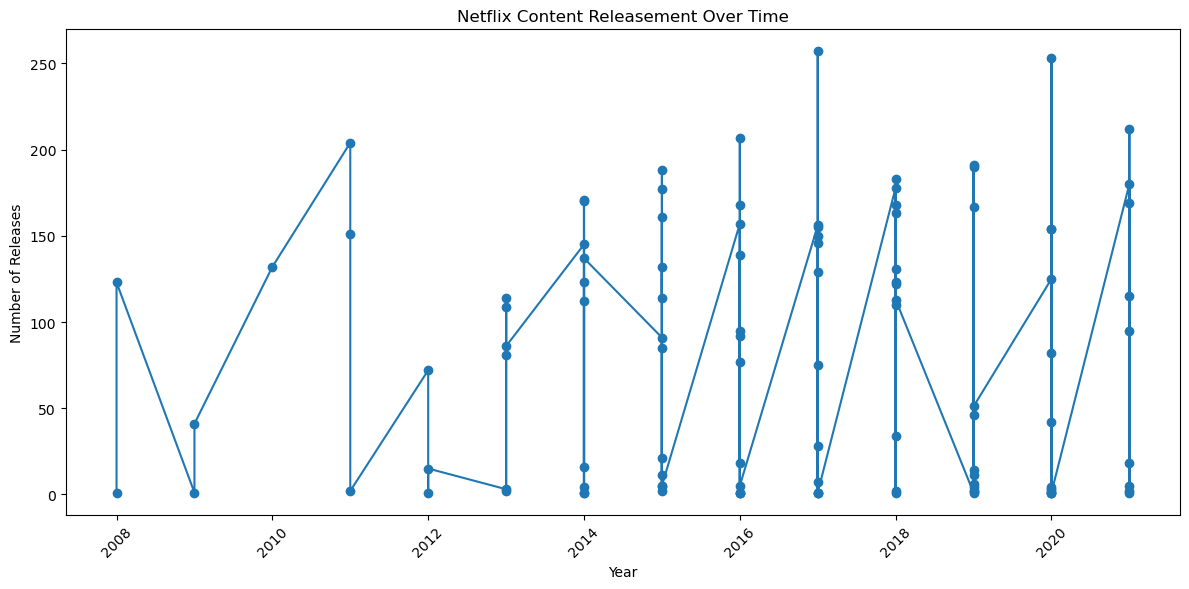

In [18]:
# Plotting the Netflix content added over time with a line graph.
plt.figure(figsize=(12, 6))
plt.plot(release_counts['year_added'], release_counts_sorted['count'], marker='o')
plt.title('Netflix Content Releasement Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

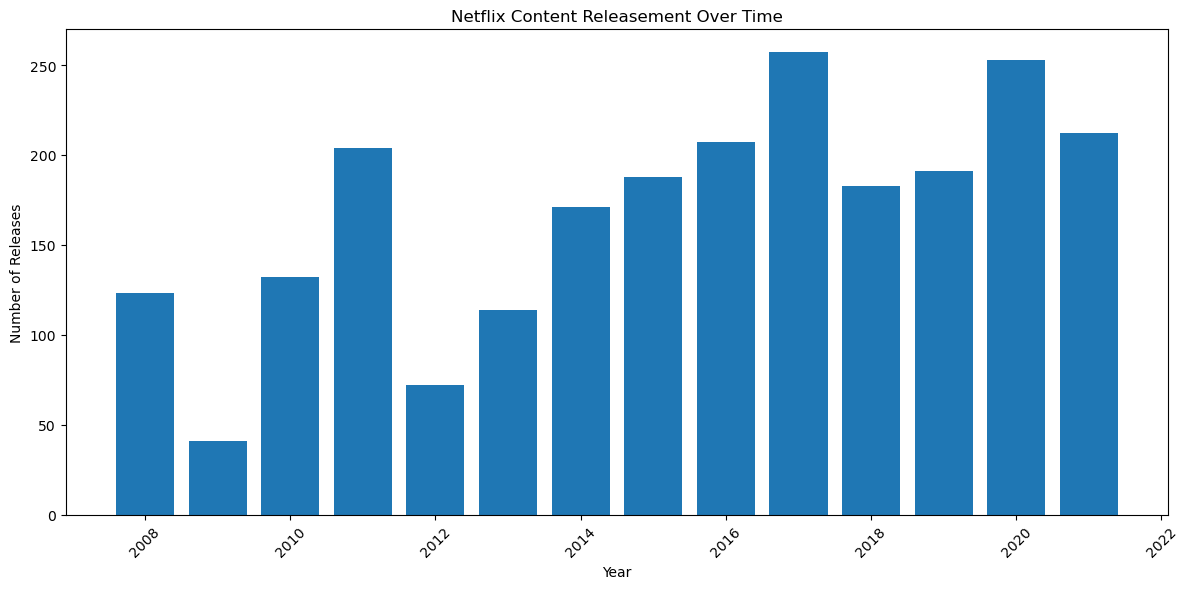

In [19]:
# Plotting the Netflix content added over time with a bar graph.
plt.figure(figsize=(12, 6))
plt.bar(release_counts['year_added'], release_counts_sorted['count'])
plt.title('Netflix Content Releasement Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

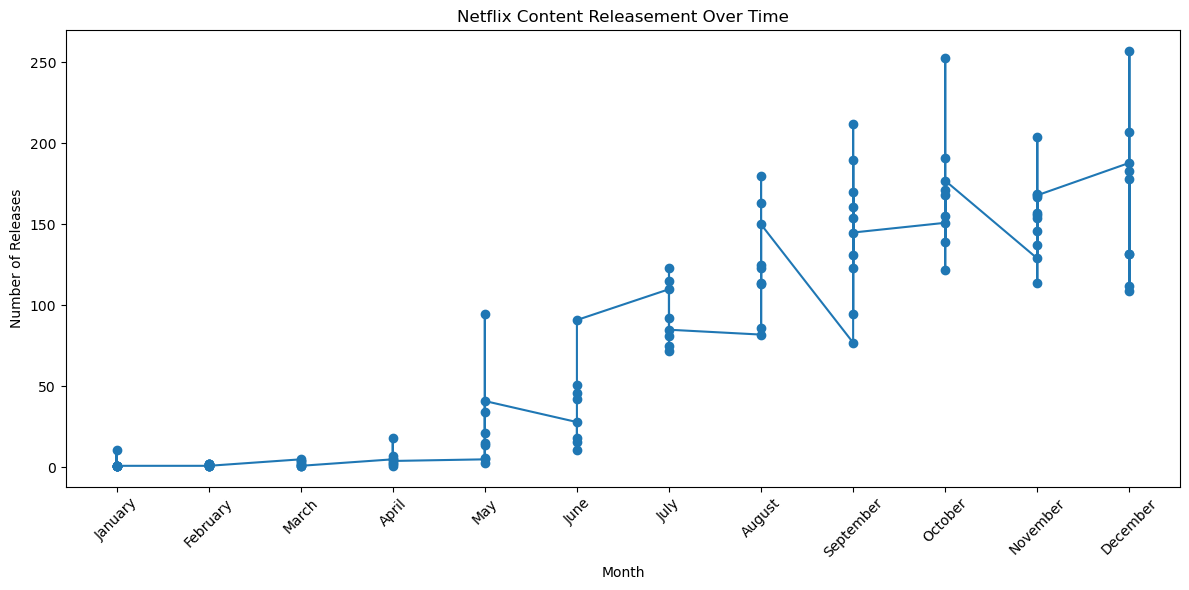

In [20]:
# Content added to Netflix monthly in a line graph
plt.figure(figsize=(12, 6))
plt.plot(release_counts_sorted['month_added'], release_counts['count'], marker='o')
plt.title('Netflix Content Releasement Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

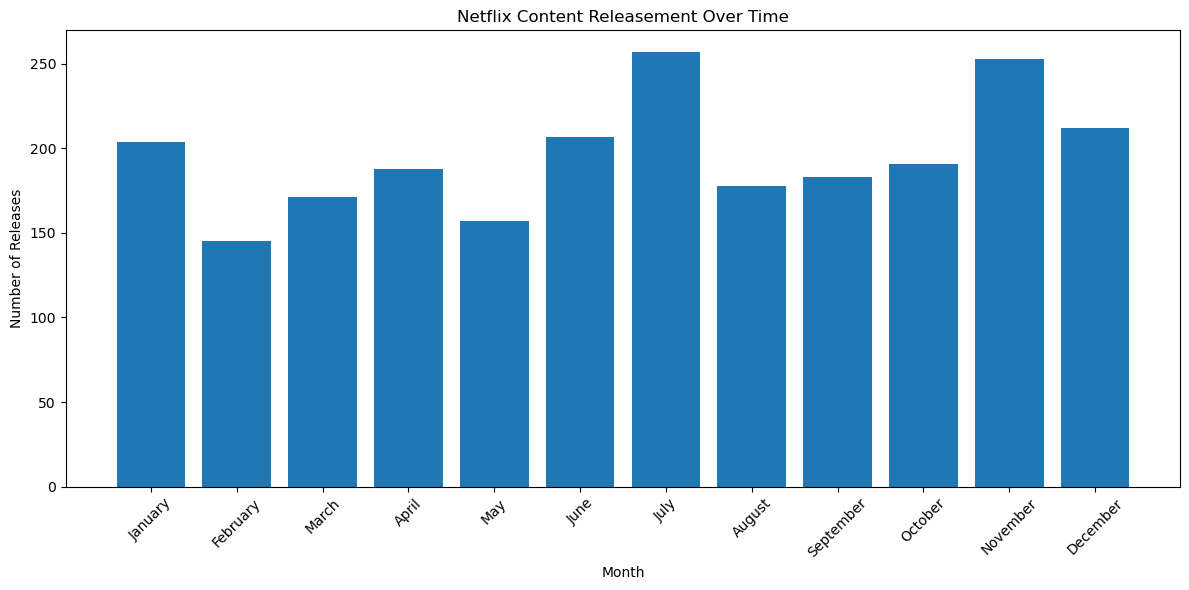

In [21]:
# Content added to Netflix monthly in a bar graph.
plt.figure(figsize=(12, 6))
plt.bar(release_counts_sorted['month_added'], release_counts_sorted['count'])
plt.title('Netflix Content Releasement Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [10]:
movie_data = release_year[release_year['type'] == 'Movie']
tv_show_data = release_year[release_year['type'] == 'TV Show']

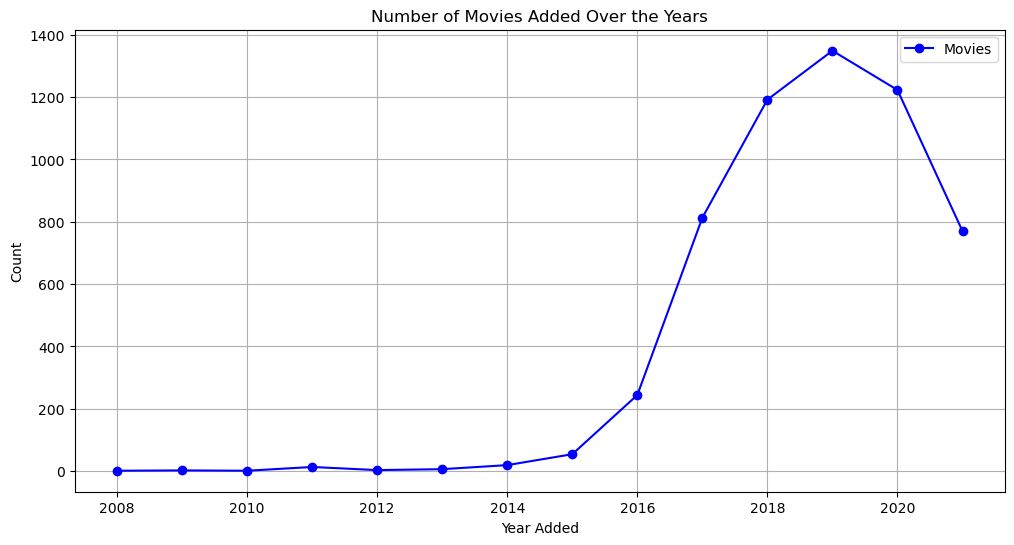

In [11]:
# Movies added to Netflix library over the years
plt.figure(figsize=(12, 6))
plt.plot(movie_data['year_added'], movie_data['count'], marker='o', color='b', label='Movies')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Number of Movies Added Over the Years')
plt.legend()
plt.grid(True)
plt.show()

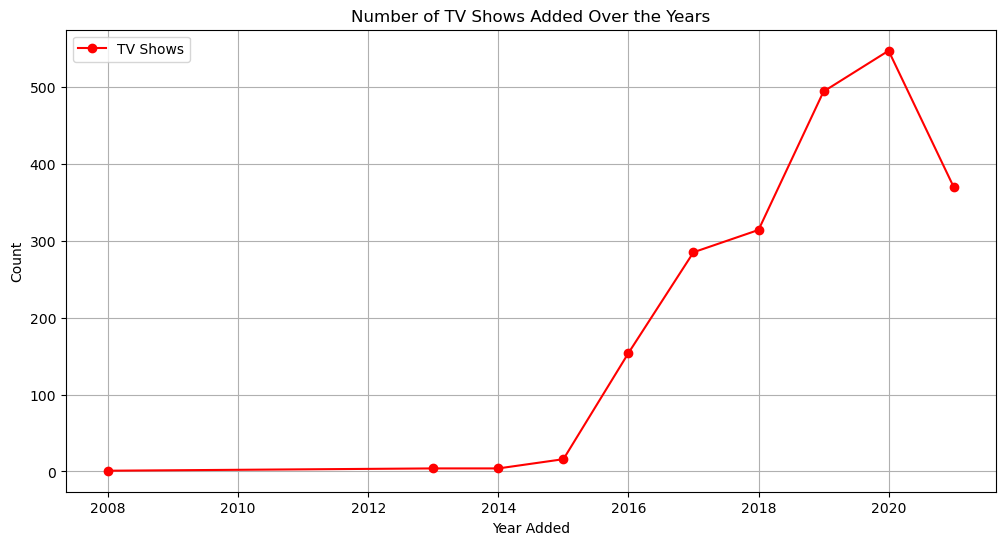

In [12]:
# TV shows added to Netflix library over the years
plt.figure(figsize=(12, 6))
plt.plot(tv_show_data['year_added'], tv_show_data['count'], marker='o', color='r', label='TV Shows')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Number of TV Shows Added Over the Years')
plt.legend()
plt.grid(True)
plt.show()

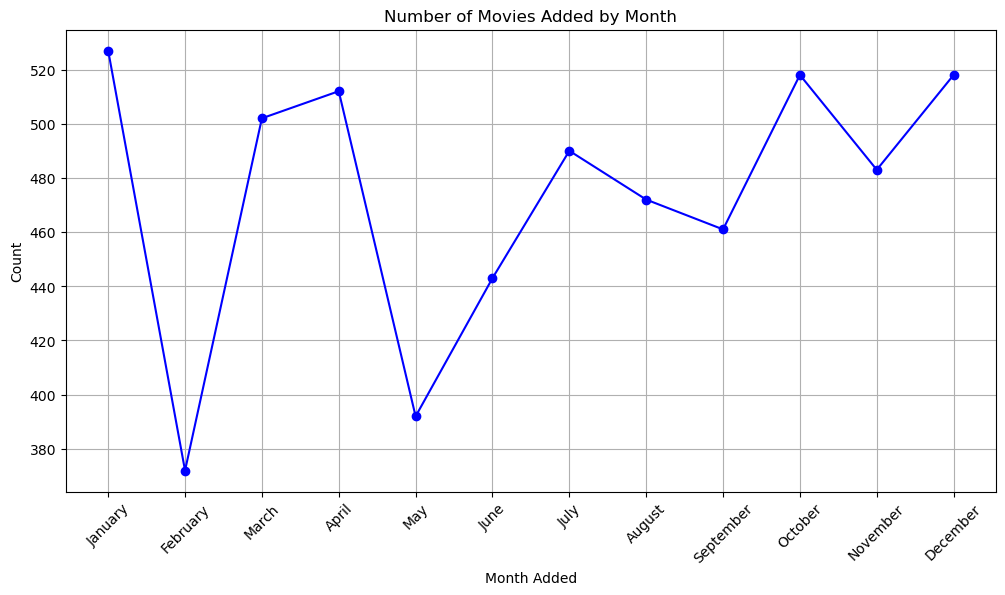

In [10]:
movies_added = release_month[release_month['type'] == 'Movie']

plt.figure(figsize=(12, 6))
plt.plot(movies_added['month_added'], movies_added['count'], marker='o', color='b', linestyle='-')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.title('Number of Movies Added by Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

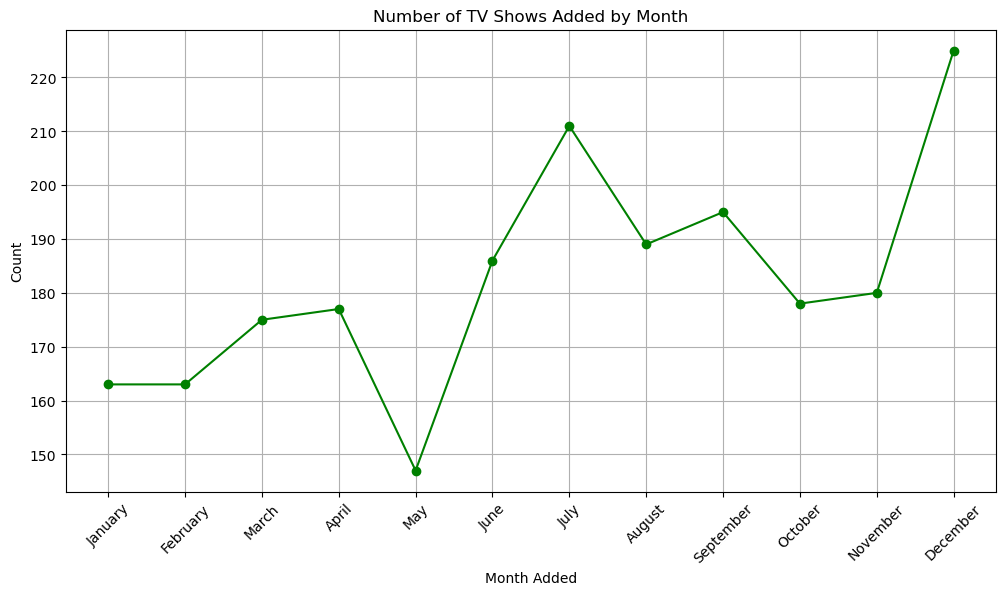

In [11]:
tv_shows_added = release_month[release_month['type'] == 'TV Show']

plt.figure(figsize=(12, 6))
plt.plot(tv_shows_added['month_added'], tv_shows_added['count'], marker='o', color='g', linestyle='-')
plt.xlabel('Month Added')
plt.ylabel('Count')
plt.title('Number of TV Shows Added by Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()